In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [2]:
n = 100000
N = 200

In [3]:
epsilon = 0.2

In [4]:
m = int(np.ceil(24 * np.log(N) * (epsilon ** -2)))

In [5]:
m

3179

In [6]:
X = np.random.normal(size=(N, n)) + 10.

In [7]:
X.shape

(200, 100000)

In [8]:
A = np.random.normal(0, 1/np.sqrt(m), (m, n))

In [9]:
X_dimred = (A @ X.T).T

In [10]:
X_dimred.shape

(200, 3179)

In [11]:
dist_orig = distance_matrix(X, X)

In [12]:
dist_orig = dist_orig[np.triu_indices_from(dist_orig, k=1)]

In [13]:
dist_dimred = distance_matrix(X_dimred, X_dimred)

In [14]:
dist_dimred = dist_dimred[np.triu_indices_from(dist_dimred, k=1)]

In [15]:
diff = (dist_dimred ** 2 - dist_orig ** 2) / dist_orig ** 2

In [16]:
diff

array([ 0.03662259,  0.00642912, -0.00545849, ..., -0.0304041 ,
       -0.04691323, -0.02393412])

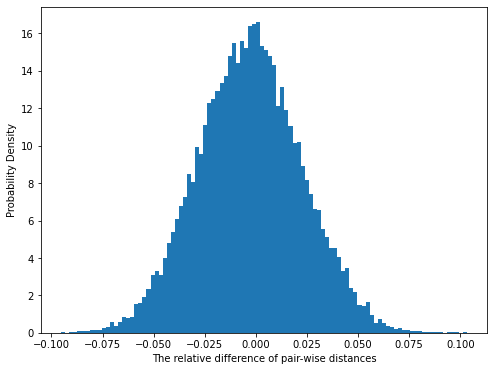

In [17]:
plt.figure(figsize=(8,6))
plt.hist(diff, bins=100, density = True)
plt.xlabel('The relative difference of pair-wise distances')
plt.ylabel('Probability Density')
plt.savefig('img/random_proj.jpg')
plt.show()